In [35]:
import pandas as pd
data = pd.read_csv('traffic.csv')

In [36]:
print("Data Inspection:")
print(data.head() )
print(data.info())
print(data.describe())

Data Inspection:
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000

In [37]:
print("\nData Cleaning:")
print("Missing Values:")
print(data.isnull().sum())


Data Cleaning:
Missing Values:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [38]:
print("\nDuplicates:")
duplicates = data.duplicated()
print(data[duplicates])


Duplicates:
Empty DataFrame
Columns: [DateTime, Junction, Vehicles, ID]
Index: []


In [39]:
print("\nData Types:")
data.dtypes


Data Types:


DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [40]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek

In [41]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Vehicles']

scaler = MinMaxScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nNormalized Dataset:")
data.head()


Normalized Dataset:


,DateTime,Junction,Vehicles,ID,Hour,DayOfWeek
0,2015-11-01 00:00:00,1,0.078212,20151101001,0,6
1,2015-11-01 01:00:00,1,0.067039,20151101011,1,6
2,2015-11-01 02:00:00,1,0.050279,20151101021,2,6
3,2015-11-01 03:00:00,1,0.033520,20151101031,3,6
4,2015-11-01 04:00:00,1,0.044693,20151101041,4,6


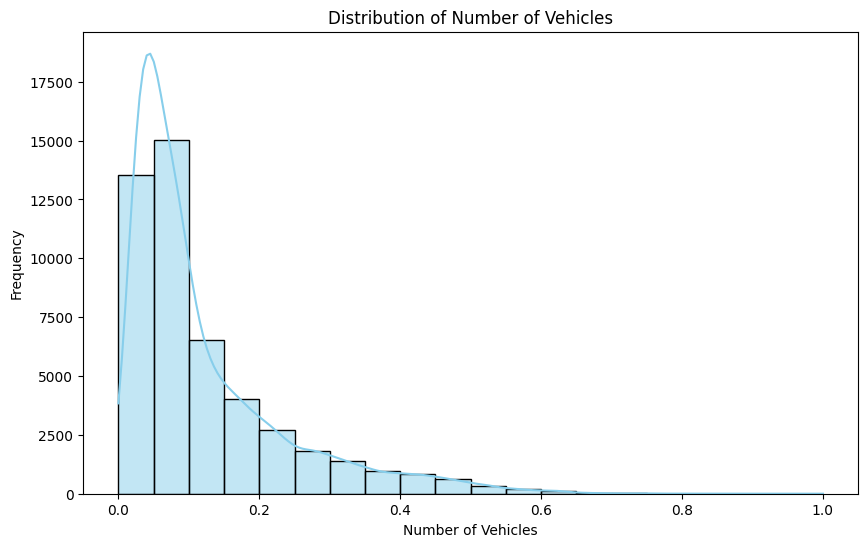

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data['Vehicles'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')

plt.show()


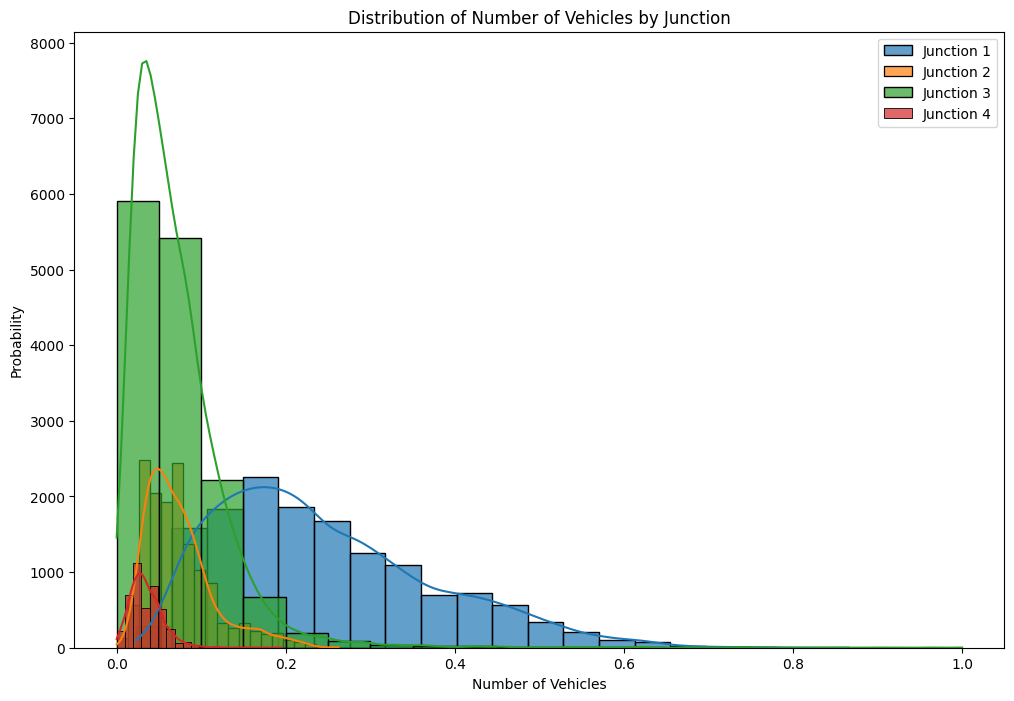

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for junction in data['Junction'].unique():

    subset_data = data[data['Junction'] == junction]

    sns.histplot(subset_data['Vehicles'], bins=20, kde=True, label=f'Junction {junction}', alpha=0.7)

plt.title('Distribution of Number of Vehicles by Junction')
plt.xlabel('Number of Vehicles')
plt.ylabel('Probability')
plt.legend()

plt.show()


<ipython-input-44-ddf707a5ea7f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


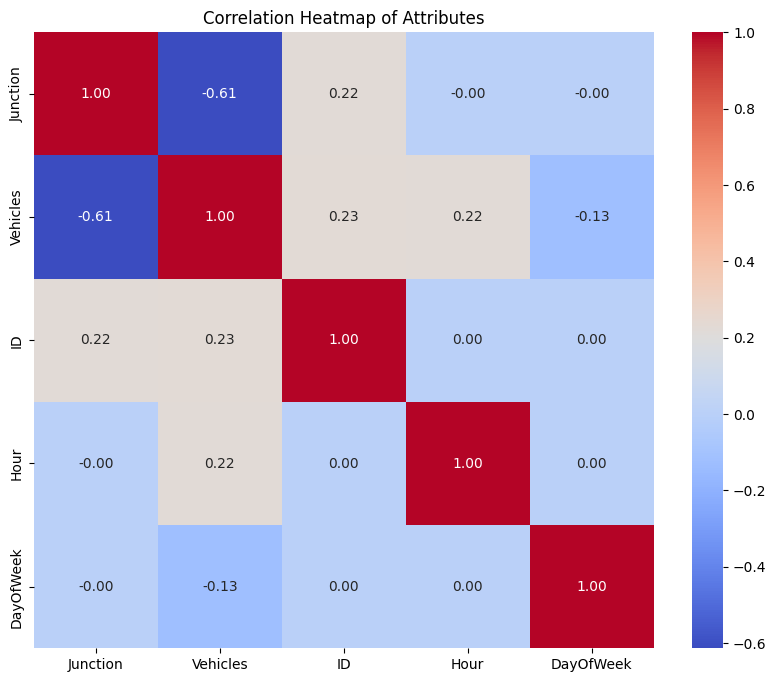

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Attributes')
plt.show()


In [47]:
#SVR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('traffic.csv')

data['DateTime'] = pd.to_datetime(data['DateTime'])

X = data.drop(['ID', 'DateTime', 'Vehicles'], axis=1)  # Using all features except 'ID', 'DateTime', and 'Vehicles'
y = data['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X_train_scaled, y_train)

y_pred_svr = svr_regressor.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("Support Vector Regression (SVR):")
print("Mean Squared Error:", mse_svr)
print("Mean Absolute Error:", mae_svr)


Support Vector Regression (SVR):
Mean Squared Error: 207.3322183512335
Mean Absolute Error: 9.324135111838258


In [48]:
#GBR

from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)

gb_regressor.fit(X_train_scaled, y_train)

y_pred_gb = gb_regressor.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)


Gradient Boosting Regression:
Mean Squared Error: 202.91881170975324
Mean Absolute Error: 9.616938632334044


In [51]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data.drop(['ID', 'Vehicles'], axis=1)
y = data['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
data = pd.read_csv('traffic.csv')

X_train['Hour'] = X_train['DateTime'].dt.hour
X_test['Hour'] = X_test['DateTime'].dt.hour

X_train.drop('DateTime', axis=1, inplace=True)
X_test.drop('DateTime', axis=1, inplace=True)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 154.41580781047944
Mean Absolute Error: 8.19501065577731


The Random Forest Regressor model seems to perform reasonably better than the other models in predicting the number of vehicles in the dataset.